WNixalo | 20181120

---

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *

## Getting the data

In [4]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/home/jupyter/.fastai/data/planet')

## Multiclassification

In [5]:
df = pd.read_csv(path/'train_v2.csv')

In [ ]:
# # another way to init data:
# np.random.seed(0)
# src = (ImageFileList.from_folder(path)
#        .label_from_csv('train_v2.csv', sep=' ', folder='train-jpg', suffix='.jpg')
#        .random_split_by_pct(0.2))

# data = (src.datasets()
#         .transform(tfms, size=128)
#         .databunch().normalize(imagenet_stats))

In [7]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [8]:
np.random.seed(0)
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(sep=' '))

data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

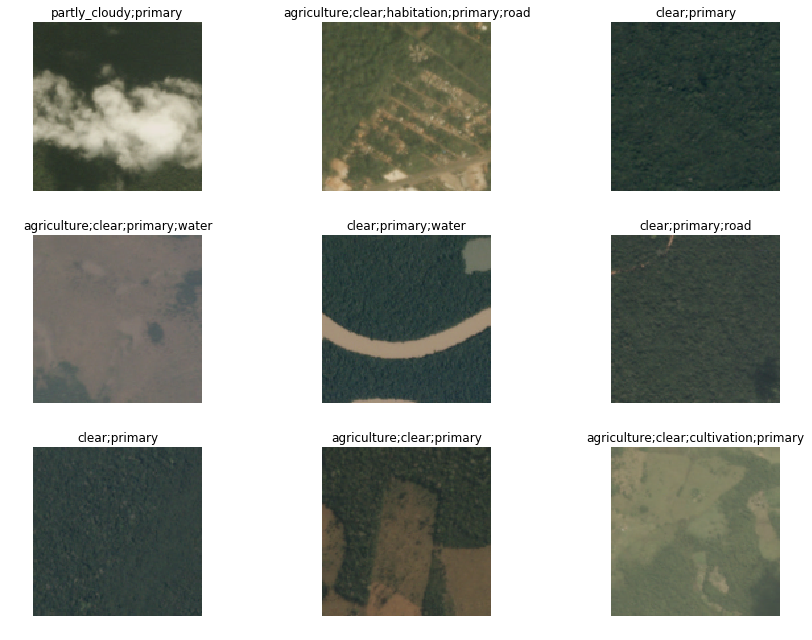

In [6]:
data.show_batch(rows=3, figsize=(12,9))

In [11]:
arch = models.resnet34

In [14]:
acc_025 = partial(accuracy_thresh, thresh=0.25)
f_score = partial(fbeta, thresh=0.25)
learn = create_cnn(data, arch, metrics=[acc_02, f_score])

### stage 1 size 128

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


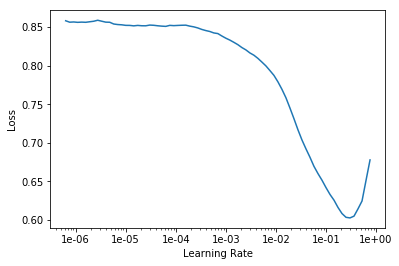

In [15]:
learn.lr_find()
learn.recorder.plot()

Then we can fit the head of our network.

In [17]:
lr = 0.02

In [18]:
learn.fit_one_cycle(5, slice(lr))

Total time: 04:39
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.119281    0.112628    0.953763         0.897500  (01:01)
2      0.117650    0.109640    0.954067         0.900346  (00:53)
3      0.110868    0.098317    0.948334         0.913862  (00:54)
4      0.099845    0.091024    0.957011         0.918613  (00:54)
5      0.097232    0.088908    0.956574         0.920808  (00:54)



RN50 course notebook:
```
Total time: 04:17
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.115247    0.103319    0.950703         0.910291  (00:52)
2      0.108289    0.099074    0.953239         0.911656  (00:50)
3      0.102342    0.092710    0.953348         0.917987  (00:51)
4      0.095571    0.085736    0.957258         0.926540  (00:51)
5      0.091275    0.085441    0.958006         0.926234  (00:51)
```

In [19]:
learn.save('stage-1-rn34-2')

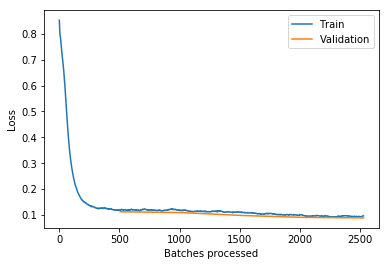

In [22]:
learn.recorder.plot_losses()

### Stage 2 size 128

In [42]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


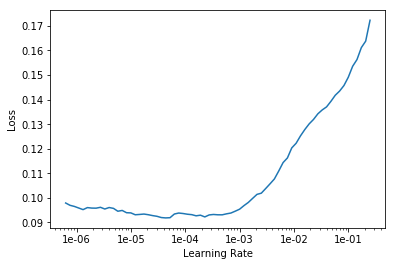

In [43]:
learn.lr_find()
learn.recorder.plot()

In [46]:
lr = 1e-3

In [45]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

Total time: 06:29
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.091631    0.088814    0.954874         0.922418  (01:17)
2      0.095250    0.088594    0.955027         0.922343  (01:18)
3      0.094480    0.086807    0.957846         0.923828  (01:18)
4      0.087861    0.084960    0.958108         0.925671  (01:18)
5      0.087794    0.085256    0.957301         0.925130  (01:17)



In [47]:
learn.save('stage-2-rn34-v2')

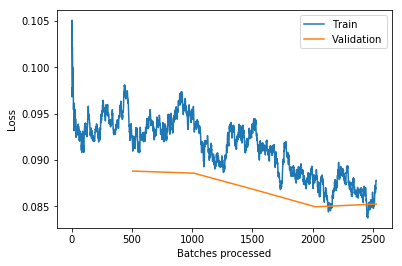

In [48]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


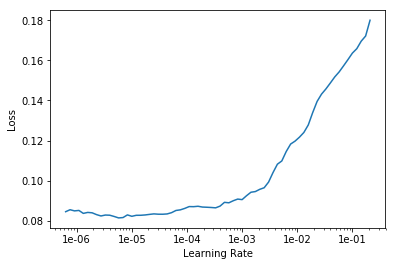

In [49]:
learn.lr_find();learn.recorder.plot()

In [50]:
lr = 1e-4

In [51]:
learn.fit_one_cycle(8, slice(1e-6, lr/2))

Total time: 10:20
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.088897    0.085095    0.958093         0.925113  (01:16)
2      0.083794    0.084719    0.957192         0.926012  (01:17)
3      0.085055    0.084927    0.958050         0.925568  (01:17)
4      0.083093    0.084709    0.957883         0.925530  (01:17)
5      0.085524    0.084823    0.959002         0.925121  (01:17)
6      0.086091    0.084410    0.958239         0.925880  (01:17)
7      0.083412    0.084690    0.958362         0.925383  (01:17)
8      0.084011    0.084554    0.957984         0.925593  (01:17)



In [52]:
learn.save('stage-2-rn34-v2')

### stage 1 size 256

In [53]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [54]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


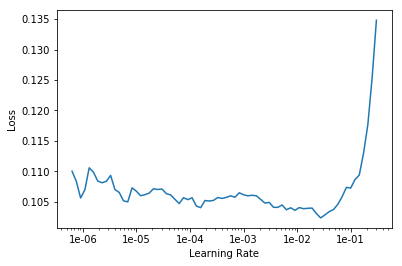

In [55]:
learn.lr_find()
learn.recorder.plot()

In [56]:
lr=1e-2/2

In [57]:
learn.fit_one_cycle(5, slice(lr))

Total time: 14:52
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.091056    0.086263    0.960048         0.924114  (02:59)
2      0.090036    0.084546    0.954591         0.927204  (02:58)
3      0.088045    0.085227    0.959823         0.924744  (02:58)
4      0.087569    0.082753    0.958319         0.928939  (02:58)
5      0.084120    0.082809    0.959016         0.926831  (02:58)



RN50 course notebook:
```
Total time: 14:21
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.088628    0.085883    0.966523         0.924035  (02:53)
2      0.089855    0.085019    0.967126         0.926822  (02:51)
3      0.083646    0.083374    0.967583         0.927510  (02:51)
4      0.084014    0.081384    0.968405         0.931110  (02:51)
5      0.083445    0.081085    0.968659         0.930647  (02:52)
```

In [58]:
learn.save('stage-1-256-rn34-v2')

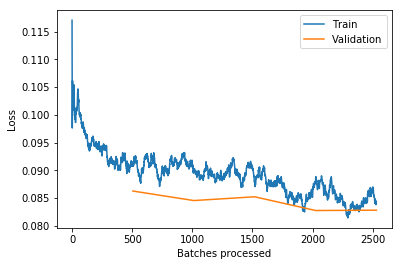

In [59]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


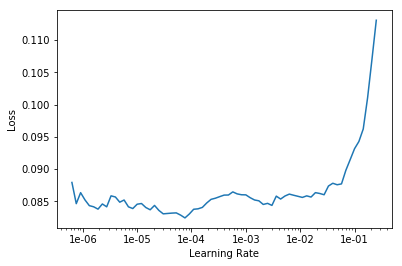

In [60]:
learn.lr_find();learn.recorder.plot()

In [61]:
lr

0.005

In [63]:
lr = 5e-4

In [64]:
learn.fit_one_cycle(5, slice(lr))

Total time: 14:52
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.085616    0.082942    0.959183         0.927472  (02:58)
2      0.084455    0.082789    0.958965         0.927775  (02:58)
3      0.084934    0.082687    0.959990         0.927774  (02:58)
4      0.084975    0.082629    0.959423         0.928074  (02:58)
5      0.082869    0.082352    0.959140         0.928255  (02:59)



In [65]:
learn.save('stage-1-256-rn34-v2')

In [66]:
lr = 5e-3 # unsure if I should do this: going back to oldern LR for unfreeze

### stage 2 size 256

In [68]:
learn.unfreeze()

In [69]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

Total time: 20:00
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.086193    0.087192    0.956712         0.923242  (03:59)
2      0.092002    0.087510    0.957672         0.923429  (04:00)
3      0.087286    0.084358    0.958086         0.924181  (03:59)
4      0.086062    0.081129    0.959242         0.928291  (04:00)
5      0.080664    0.080919    0.959852         0.928882  (03:59)



RN50 course notebook:
```
Total time: 18:23
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.083591    0.082895    0.968310         0.928210  (03:41)
2      0.088286    0.083184    0.967424         0.928812  (03:40)
3      0.083495    0.083084    0.967998         0.929224  (03:40)
4      0.080143    0.081338    0.968564         0.931363  (03:40)
5      0.074927    0.080691    0.968819         0.931414  (03:41)
```

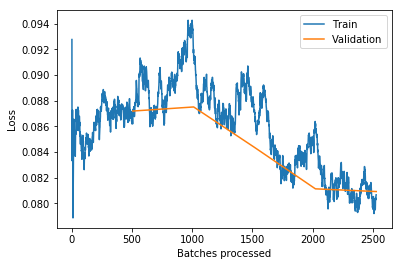

In [70]:
learn.recorder.plot_losses()

In [71]:
learn.save('stage-2-256-rn34-v2')

>You won't really know how you're going until you submit to Kaggle, since the leaderboard isn't using the same subset as we have for training. But as a guide, 50th place (out of 938 teams) on the private leaderboard was a score of `0.930`.

In [105]:
# doc(learn.freeze_to)

In [104]:
# len(learn.layer_groups)

In [103]:
# len(learn.layer_groups[0]), learn.layer_groups[0]

In [102]:
# len(learn.layer_groups[1]), learn.layer_groups[1]

In [101]:
# len(learn.layer_groups[2]),learn.layer_groups[2]

In [100]:
# learn.model.parameters

### progressive freeze|unfreeze: 1 | 2,3

In [109]:
learn.freeze_to(1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


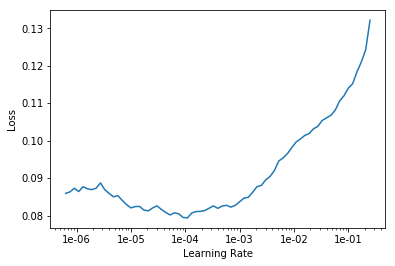

In [110]:
learn.lr_find();learn.recorder.plot()

In [111]:
lr = 1e-3

In [114]:
learn.fit_one_cycle(5, slice(5e-6, lr/5))

Total time: 16:58
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.082328    0.081534    0.961174         0.928840  (03:22)
2      0.080206    0.082238    0.958478         0.927139  (03:24)
3      0.081995    0.081557    0.960579         0.928241  (03:23)
4      0.079232    0.080997    0.960157         0.928961  (03:24)
5      0.076606    0.080946    0.960426         0.929023  (03:23)



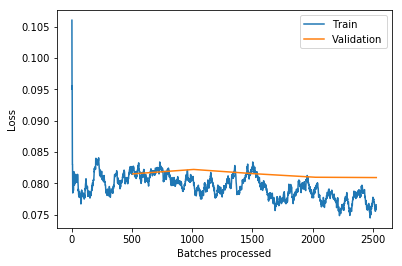

In [115]:
learn.recorder.plot_losses()

Does this work better or does the previous one?

In [116]:
learn.save('stage-2-256-rn34-v2-refreeze-to-1')

## Test set

In [119]:
learn.data.

<function fastai.vision.data.ImageDataBunch.single_from_classes(path:Union[pathlib.Path, str], classes:Collection[str], tfms:Union[Callable, Collection[Callable]]=None, label_cls=<class 'fastai.data_block.CategoryList'>, **kwargs)>

In [117]:
idx2class = idx2class = {v:k for k,v in learn.data.train_ds.ds.class2idx.items()}

AttributeError: 'MultiCategoryList' object has no attribute 'ds'

In [120]:
subm_df = pd.read_csv(path/'sample_submission_v2.csv')
subdic = {c1:c2 for c1,c2 in zip(subm_df.image_name,subm_df.tags)}

In [121]:
def set_test_datafolder(learner, test_folder):
    learner.data = (src.add_test_folder(test_folder)
                    #.datasets(ImageMultiDataset)
                    # looks like since last time (9 days ago)
                    # ImageMultiDataset is no longer used in fastai
                    .transform(tfms, size=256)
                    .databunch().normalize(imagenet_stats))

1st dataset portion

In [122]:
set_test_datafolder(learn, 'test-jpg')
raw_preds = learn.TTA(ds_type=DatasetType.Test)

Total time: 11:54



In [123]:
len(raw_preds), raw_preds[0].shape, raw_preds[1].shape

(2, torch.Size([40669, 17]), torch.Size([40669, 17]))

In [124]:
preds = copy(raw_preds)

*How do you get the test-set filenames and the class-to-index now that there isn't a `learn.data.test_ds.ds` anymore?*

... there has to be a way to match up predictions or data to their filenames... maybe I'll get lucky and the ordering of the submission csv will match the order of the test dataset... but what if it doesn't?

In [ ]:
# NOTE no longer valid in fastai 1.0.25:
# fnames = [f.name.split('.')[0] for f in learn.data.test_ds.ds.x]

2nd dataset portion

In [145]:
set_test_datafolder(learn, 'test-jpg-additional')
raw_preds = learn.TTA(ds_type=DatasetType.Test)

Total time: 06:07



***NOTE: CONTINUE FROM HERE (20181120)***

In [146]:
preds = (torch.cat((preds[0],raw_preds[0])), torch.cat((preds[1],raw_preds[1])))

In [148]:
torch.save(preds, 'preds_rn34_20181120.pkl')

In [149]:
temp = torch.load('preds_rn34_20181120.pkl')

In [154]:
torch.equal(preds[0],temp[0]), torch.equal(preds[1], temp[1])

(True, True)

In [ ]:
# NOTE no longer valid in fastai 1.0.25:
# fnames.extend([f.name.split('.')[0] for f in learn.data.test_ds.ds.x])

## Submitting predictions to Kaggle

In [ ]:
import datetime
date = str(datetime.date.today()).replace('-','')

In [ ]:
th = 0.3

for i,fn in enumerate(fnames):
    subdic[fn] = ' '.join(idx2class[cdx] for cdx in np.where(preds[0][i]>=th)[0])
    
subm_col = [subdic[fn] for fn in subm_df.image_name]
subm_df.tags = subm_col

In [ ]:
sub_name = f'planet_stage-2-256-rn50_{date}_th{str(th)}.csv'
subm_df.to_csv(path/'submissions/'/sub_name, index=False, )
! kaggle competitions submit -c planet-understanding-the-amazon-from-space -f {path}/submissions/{sub_name} -m "fastai 1.0; 2-stg; RN34; threshold="{th}